In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uproot
import random
import os
from sklearn.model_selection import train_test_split

from config import *
from utils import *

In [2]:
bkg = np.load(train_val_test + 'background.npy')
val = np.load(train_val_test + 'background_val.npy')
test = np.load(train_val_test + 'background_test.npy')

In [3]:
val_df = pd.DataFrame(val, columns=cols)
bkg_df = pd.DataFrame(bkg, columns=cols)
test_df = pd.DataFrame(test, columns=cols)

In [4]:
rew_v = 1/(np.sum(val_df['weight'])/np.sum(bkg_df['weight']))
rew_t = 1/(np.sum(test_df['weight'])/np.sum(bkg_df['weight']))

In [5]:
val = val_df.values
bkg = bkg_df.values
test = test_df.values

In [8]:
all_signal = []
signal_name = []
all_signal_dict = {}
all_signal_split_dict = {}
signal_name_path = os.listdir(numpy_sig)

for i, name in enumerate(signal_name_path):
    
    all_signal.append(np.load(numpy_sig + name))
    if 'p0' in name:
        signal_name.append(''.join(name.split('Wh_hbb_')[1].split('p0')[0:2]))
    else:
        signal_name.append(''.join(name.split('Wh_hbb_')[1].split('p5')[0:2]))
        
    all_signal_dict[signal_name[-1]] = all_signal[-1]
#     X_train, X_test, _, _ = train_test_split(all_signal[-1], [0]*len(all_signal[-1]), test_size=0.30, random_state=42)
#     all_signal_split_dict[signal_name[-1]] = X_train

In [9]:
signal_to_plot = ['300_100', '500_0','600_150','700_350']

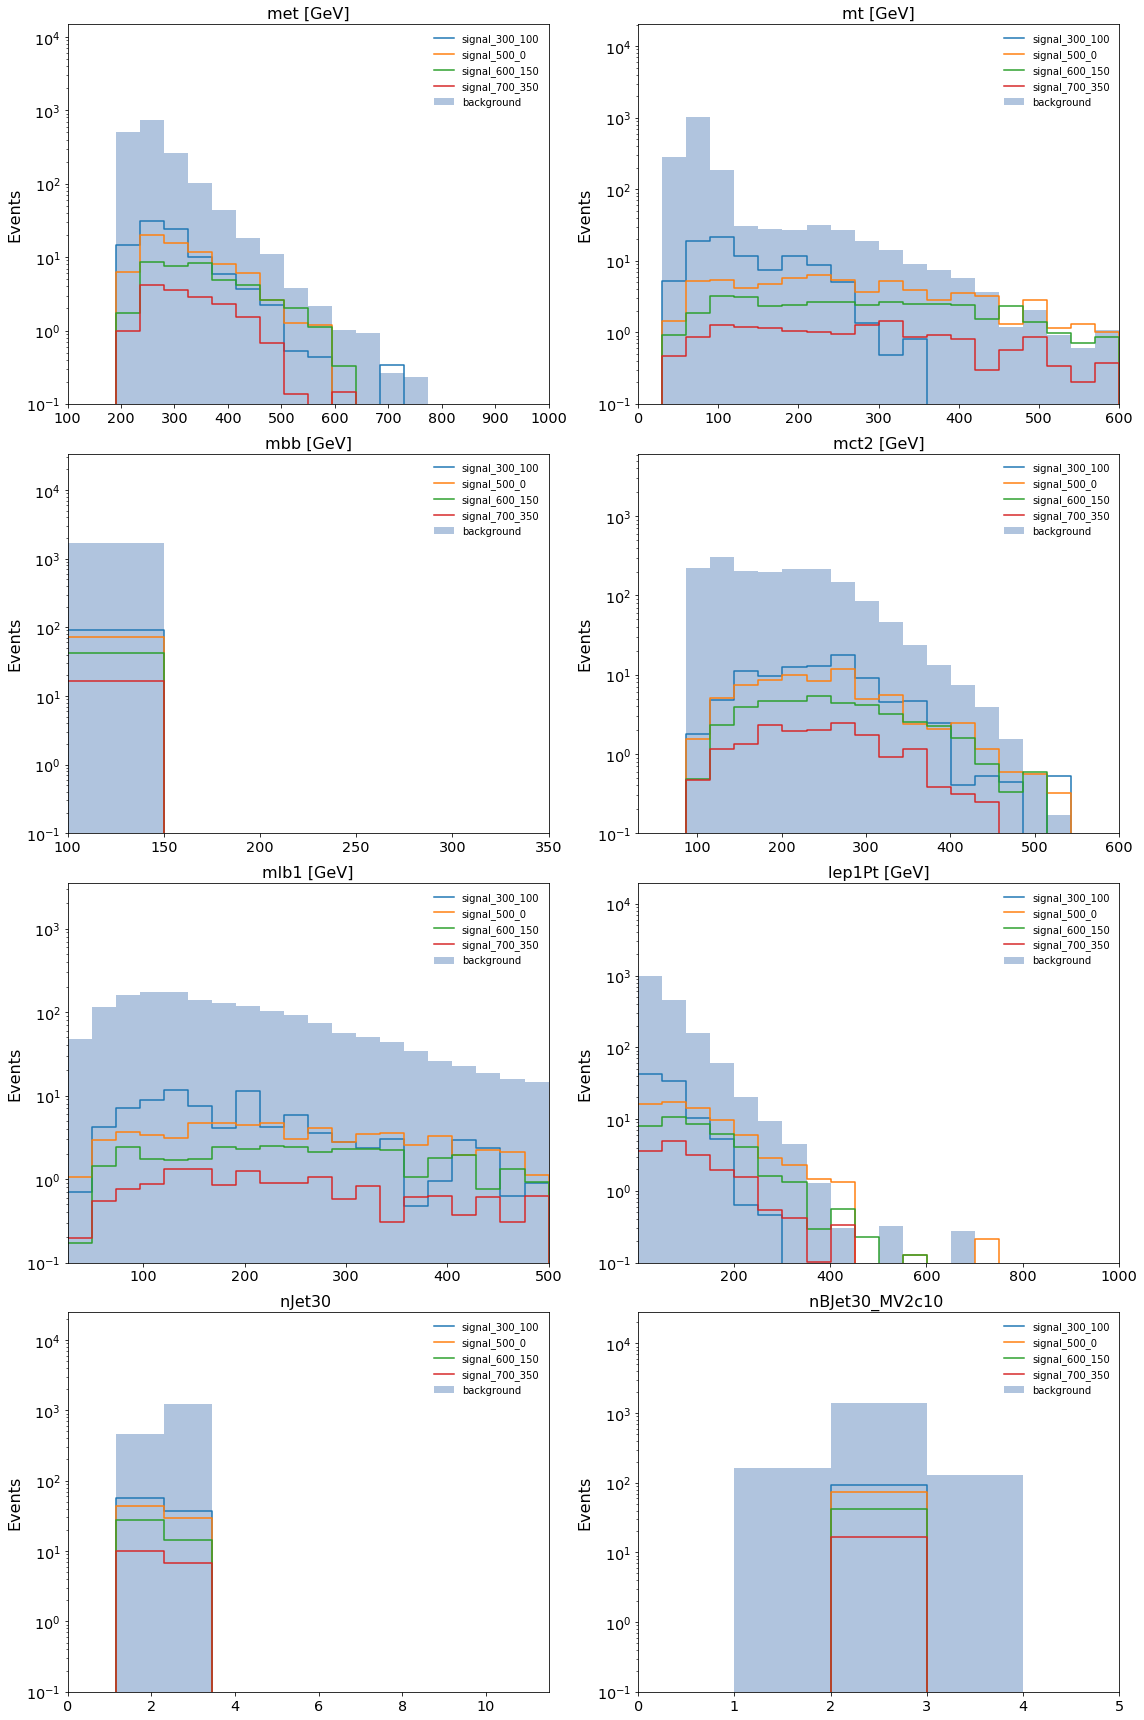

In [10]:
f,a = plt.subplots(4,2, figsize=(16, 24))
a = a.ravel()
min_e = [100,   0,   100,   30, 25, 1.5, 0, 0]
max_e = [1000, 600, 350, 600, 500,1000, 11.5, 5]
bins = [20,20,5,20,20,20, 10, 5]

for idx,ax in enumerate(a):
    
    for i, sig_name in enumerate(signal_to_plot):

        histo_range = (min_e[idx], max_e[idx])
        counts_s, edges_s = np.histogram((all_signal_dict[sig_name][:,idx]).astype(float),range = histo_range,
                                         bins = bins[idx], weights=all_signal_dict[sig_name][:,-1])
        ax.step(x=edges_s, y=np.append(counts_s, 0),
                where="post", label='signal_{}'.format(signal_to_plot[i]),
               )
  
    histo_range = (min_e[idx], max_e[idx])
    counts_b, edges_b = np.histogram((bkg[:,idx]).astype(float), range = histo_range,
                                     bins = bins[idx], weights=bkg[:,-1])
   
    ax.hist((bkg[:,idx]).astype(float), range = histo_range,
                                     bins = bins[idx], weights=bkg[:,-1],
            color = 'lightsteelblue', label='background')
    
#     ax.step(x=edges_b, y=np.insert(counts_b,0,0))

    if idx < 6:
        ax.set_title('{} [GeV]'.format(cols[idx]), fontsize=16)
    else:
        ax.set_title('{} '.format(cols[idx]), fontsize=16)
        
    ax.set_yscale('log')
    ax.set_ylabel('Events', fontsize=16)
    ax.tick_params(labelsize='x-large')
    ax.set_xlim(left=min_e[idx], right = max_e[idx])
    ax.set_ylim(bottom = 10**-1, top = max(counts_b)*20)
    ax.legend(loc='upper right', frameon=False, fontsize=10)
    
#     ax.legend(loc='upper right', frameon=False, fontsize=16)

#     plt.savefig('data_distribution_signal_mbb_sig_10.pdf')

    
plt.tight_layout()

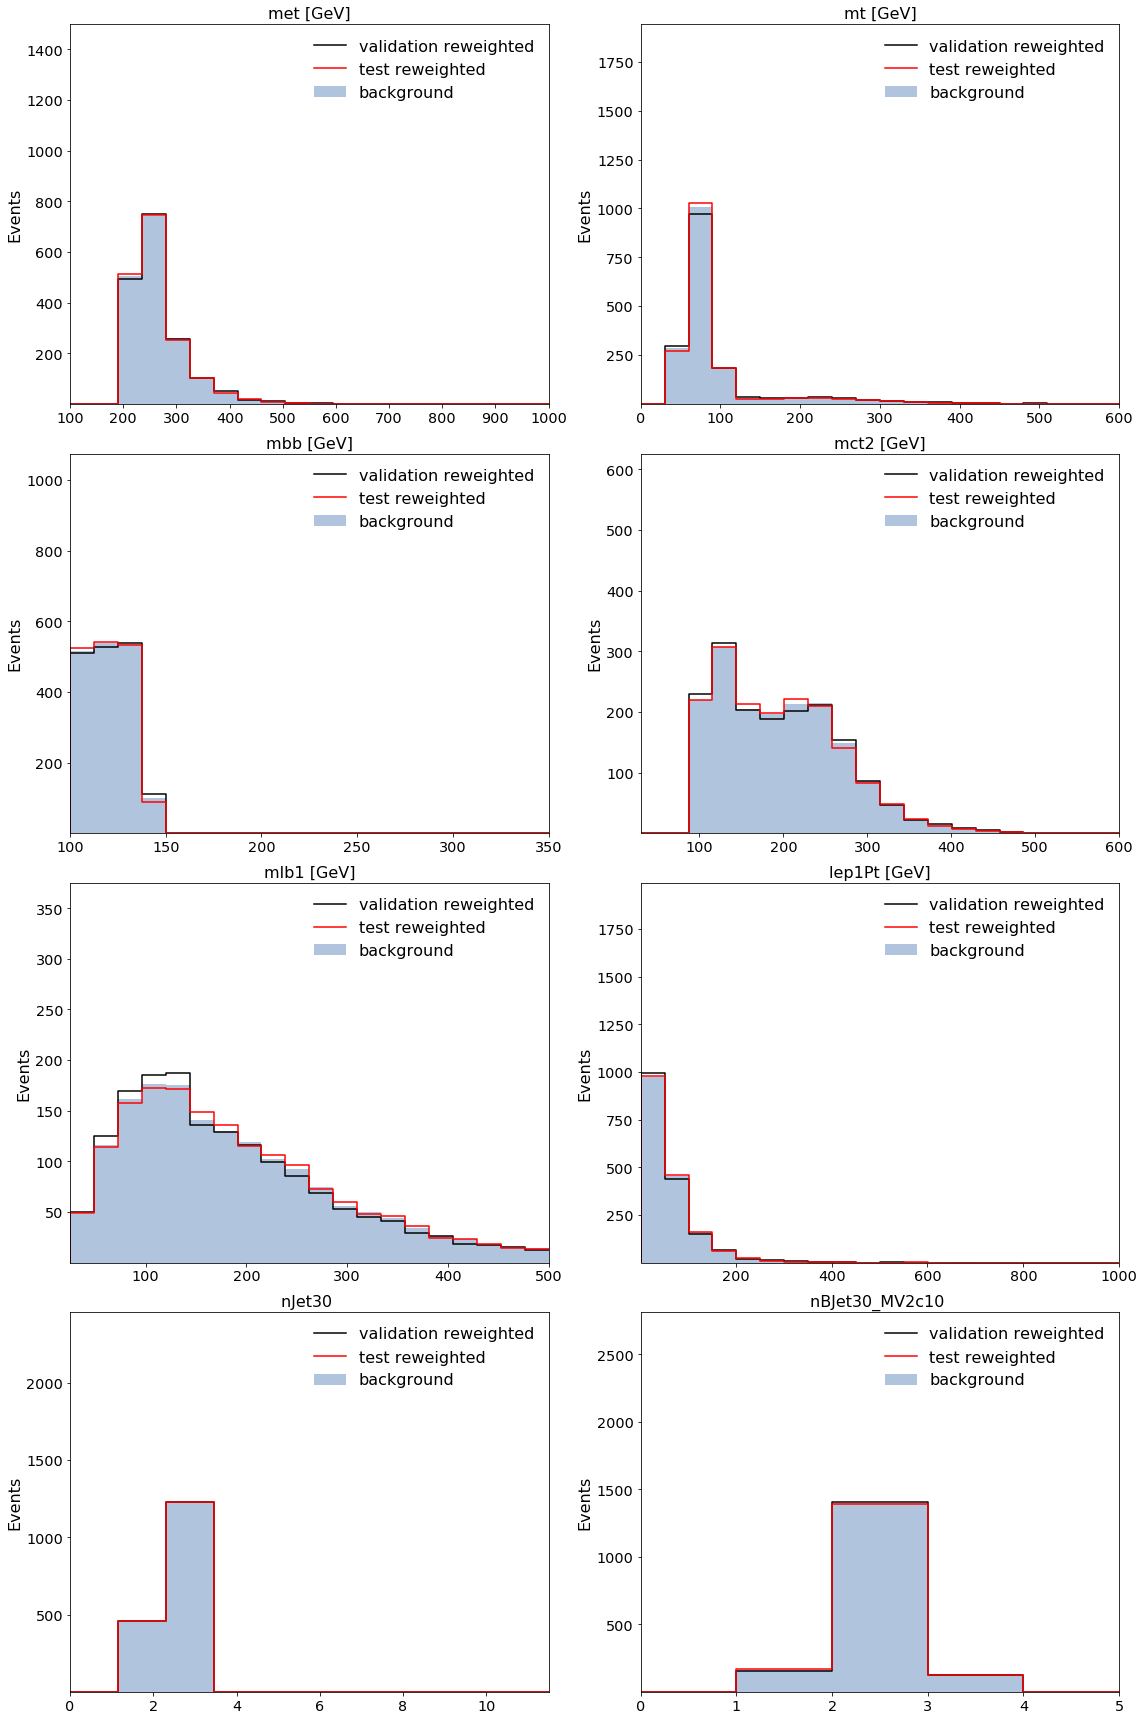

In [11]:
f,a = plt.subplots(4,2, figsize=(16, 24))
a = a.ravel()
min_e = [100,   0,   100,   30, 25, 1.5, 0, 0]
max_e = [1000, 600, 350, 600, 500,1000, 11.5, 5]
bins = [20,20,20,20,20,20, 10, 5]

for idx,ax in enumerate(a):

    
    histo_range = (min_e[idx], max_e[idx])
    counts_b_v, edges_b_v = np.histogram((val[:,idx]).astype(float), range = histo_range,
                                     bins = bins[idx], weights=val[:,-1]*rew_v)
    counts_b_t, edges_b_t = np.histogram((test[:,idx]).astype(float), range = histo_range,
                                     bins = bins[idx], weights=test[:,-1]*rew_t)
   
    ax.hist((bkg[:,idx]).astype(float), range = histo_range,
                                     bins = bins[idx], weights=bkg[:,-1],
            color = 'lightsteelblue', label='background')
    
    ax.step(x=edges_b_v, y=np.insert(counts_b_v,0,0),
            color = 'black', label = 'validation reweighted')
    
    ax.step(x=edges_b_t, y=np.insert(counts_b_t,0,0),
            color = 'red', label = 'test reweighted')
    
 
    if idx < 6:
        ax.set_title('{} [GeV]'.format(cols[idx]), fontsize=16)
    else:
        ax.set_title('{} '.format(cols[idx]), fontsize=16)
        
#     ax.set_yscale('log')
    ax.set_ylabel('Events', fontsize=16)
    ax.tick_params(labelsize='x-large')
    ax.set_xlim(left=min_e[idx], right = max_e[idx])
    ax.set_ylim(bottom = 10**-1, top = max(counts_b_v)*2)
    ax.legend(loc='upper right', frameon=False, fontsize=16)

#     plt.savefig('data_distribution_signal_mbb_10.pdf')

    
plt.tight_layout()